In [14]:
import pandas as pd #analisis de datos
import numpy as np #operaciones matematicas con vectores y matrices
import matplotlib.pyplot as plt #genera graficas
import seaborn as sb #basada en  matplotlib, genera graficas visualmente más atractivas
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min #calcula la distancia minima entre un punto y una coleccion de puntos
from sklearn.preprocessing import StandardScaler #extencion de sklearn para estandarizar datos
from sklearn.decomposition import PCA #extencion de sklearn para principal component analysis
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D #extencion de matplotlib para graficas en 3D
plt.rcParams['figure.figsize'] = (16, 9) #se establece el tamaño de las graficas
plt.style.use('ggplot') # establece un estilo de graficas popular en R

In [3]:
dataframe = pd.read_csv(r"analisis.csv") #se lee el archivo dataset en csv
dataframe.head() #obtiene los primeros 10 registros del dataset

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [4]:
dataframe.describe() #calcula los datos estadisticos que describen al dataset

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [5]:
#vemos cuantos usuarios hay de cada categoria
print(dataframe.groupby('categoria').size()) #agrupa los datos iguales de la columna categoria 
                                             #e imprime la longitud de los conjuntos

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


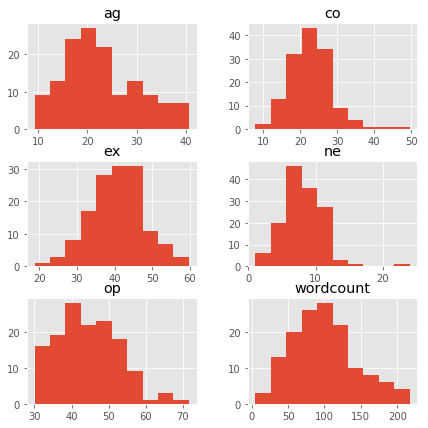

In [22]:
dataframe.drop(['categoria'],1).hist(figsize=(7,7))#remueve la columna categoria y genera un histogramas de 7x7
plt.show() #muestra los histogramas generados previamente

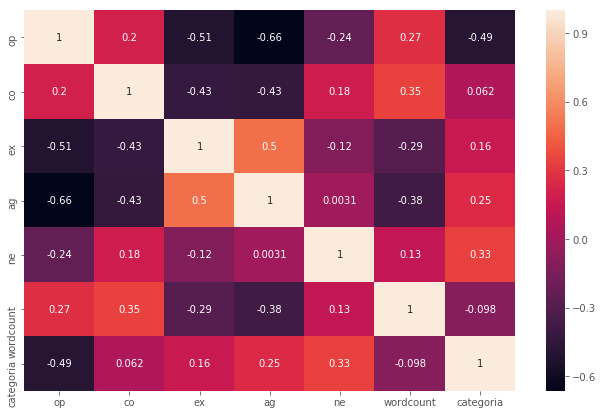

In [25]:
correlation_mat = dataframe.corr() #se obtiene la matriz de correlacion 
plt.subplots(figsize=(11,7)) #se indica que tendra subplots
sb.heatmap(correlation_mat, annot = True,) #se genera el mapa de calor con anotaciones de la matriz de correlacion
plt.show() #muestra el mapa de calor

/home/ricardo/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


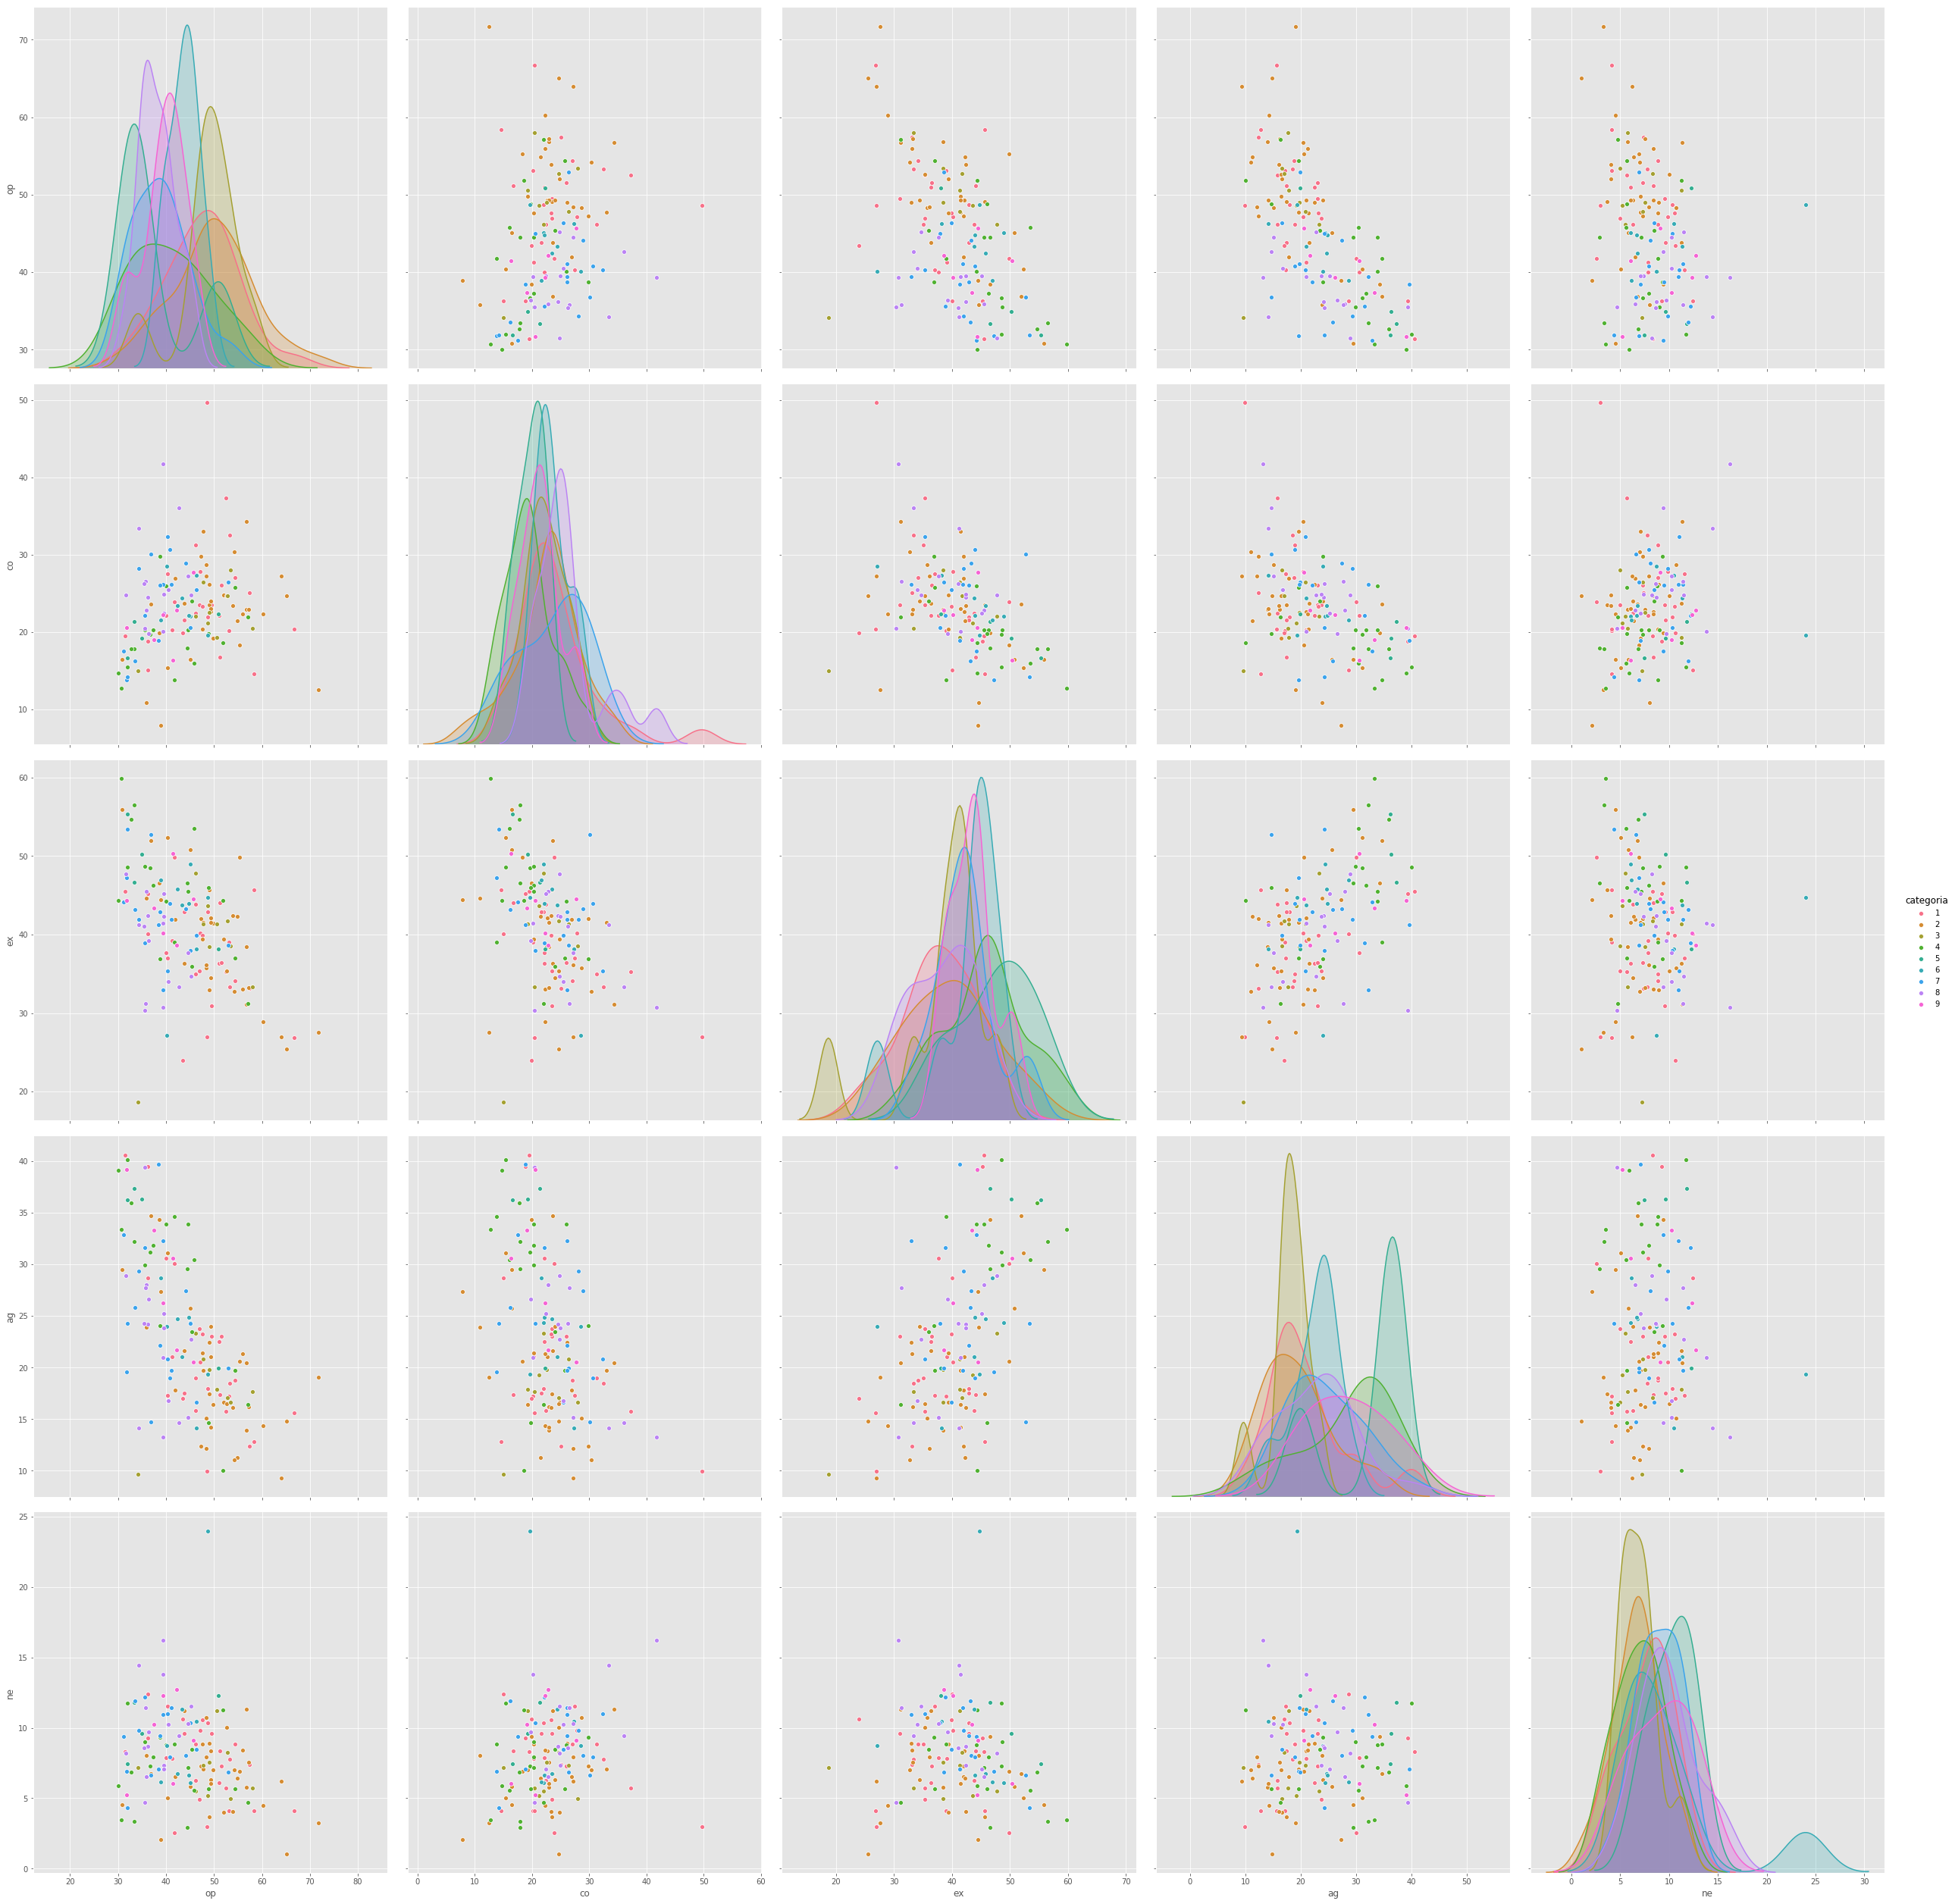

In [24]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=7,vars=["op","co","ex","ag","ne"],kind='scatter')
#se obtienen las graficas interrelacion en pares 

In [10]:
#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(dataframe[["op","ex","ag"]]) #arreglo de numpy con las 3 dimensiones tomadas en cuenta
y = np.array(dataframe['categoria']) #arreglo de numpy con los valores de la varible predictora
print(X.shape) #imprime la forma del arreglo X
print(y) #Imprime los valores del arreglo Y 

(140, 3)
[7 7 4 2 4 7 7 5 7 7 3 1 1 2 8 3 4 6 2 4 2 3 3 7 2 4 8 1 4 3 8 1 2 7 4 5 1
 2 2 1 6 2 6 1 1 2 6 3 1 7 2 8 6 2 8 2 1 3 8 2 8 4 2 1 8 9 1 1 2 4 6 8 8 4
 9 2 8 4 4 9 5 2 4 1 2 7 2 3 2 1 2 7 2 2 1 7 7 2 4 6 1 1 1 4 2 4 2 8 7 5 9
 9 8 9 7 1 8 2 4 8 8 2 2 1 2 1 6 2 4 2 1 1 1 7 3 7 4 2 1 1]


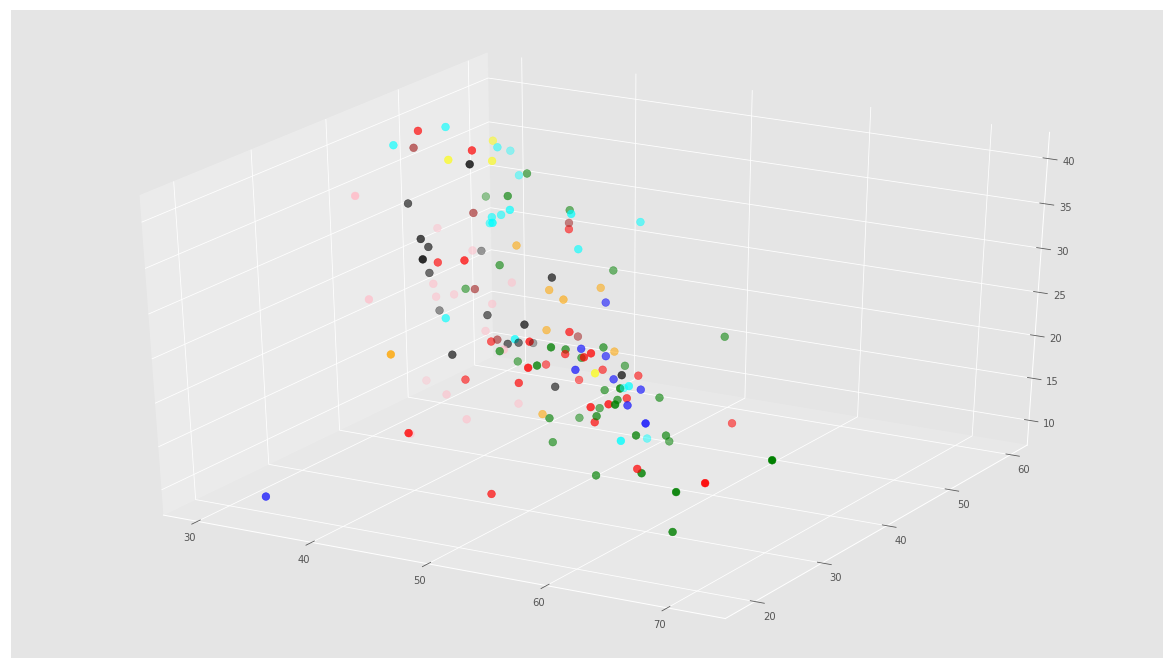

In [11]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1. 
asignar=[] #arreglo vacio que contendra los colores de los puntos 
for row in y:  #for que asigna color a los puntos en Y
    asignar.append(colores[row]) # instruccion que es iterada que llena el arreglo asignar
    
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60) #grafica 3D de tipo scatter con los valores de X

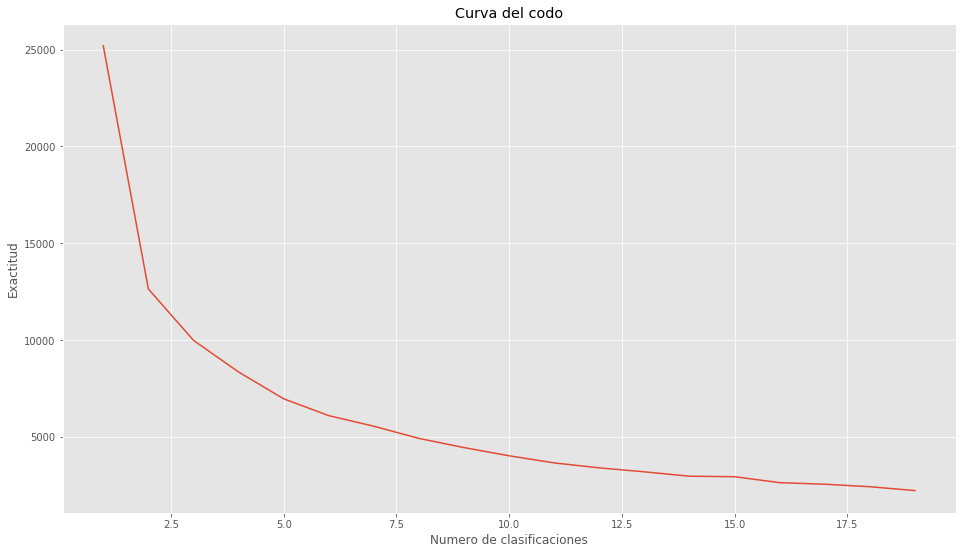

In [157]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc] #genera clusters del 1 al 20

score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]#calcula score para cada numero de clusters

plt.plot(Nc,score) #histograma eje X:numero de clusters, eje Y:scores inertia obtenidos 
plt.xlabel('Numero de clasificaciones') #etiqueta del eje X
plt.ylabel('Exactitud') #etiqueta del eje Y
plt.title('Curva del codo') #etiqueta de titulo
plt.show() #muestra el histograma de la curva del codo


In [160]:
scaler=StandardScaler()# Instancia para normalizar los datos
X_PCA=np.array(dataframe[["op","co","ex","ag","ne","wordcount"]])
scaler.fit(X_PCA) # calculo la media y estandar para escalar posteriormente
X_scaled=scaler.transform(X_PCA)# Se realiza la estandarizacion, centrando y escalando

#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=4) # se instancia el PCA, con el numero de variables que tiene el dataset
pca.fit(X_scaled) # entrena el modelo con los valores escalados 
X_pca=pca.transform(X_scaled) # y aplica la reduccion de dimensiones
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_ #regresa un vector de la varianza explicada en cada dimension
print(expl) #se imprime lo anterior
print('suma:',expl[0:4].sum())#Vemos que con 4 componentes tenemos algo mas del 85% de varianza explicada

shape of X_pca (140, 4)
[0.44010893 0.21092089 0.12155993 0.10509086]
suma: 0.8776806170192137


In [130]:
# Para el ejercicio, elijo 5 como un buen valor de K. Pero podría ser otro.
kmeans = KMeans(n_clusters=5).fit(X) #SE ENTRENA EL ALGORITMO PARA OBTENER 5 GRUPOS 
centroids = kmeans.cluster_centers_ # OBTIENE LAS COORDENADAS DE LAS CATEGORIAS (CENTROIDES)
print(centroids) #imprime los centroides obtenidos

[[42.66891482 33.31008136 21.11530482]
 [39.55874337 44.81190669 24.291027  ]
 [58.70462307 30.53566167 15.72207033]
 [50.15530371 40.81295548 17.39048745]
 [35.39154169 47.17372597 34.50044186]]


In [131]:
# Para el ejercicio, elijo 5 como un buen valor de K. Pero podría ser otro.
kmeansPCA = KMeans(n_clusters=5).fit(X_pca) #SE ENTRENA EL ALGORITMO PARA OBTENER 5 GRUPOS 
centroidsPCA = kmeansPCA.cluster_centers_ #SE ENTRENA EL ALGORITMO PARA OBTENER 5 GRUPOS 
print(centroidsPCA) #SE ENTRENA EL ALGORITMO PARA OBTENER 5 GRUPOS 

[[-0.0182967   0.45845647  0.67680101  0.20653195]
 [ 1.92017061  0.60628055  0.12952329  0.75813344]
 [ 1.09072435 -1.05935649 -0.09540665 -0.30046385]
 [-2.0893083  -0.18830831 -0.05617931  0.14886291]
 [ 0.70971915  1.48771137 -0.85568933 -0.77355201]]


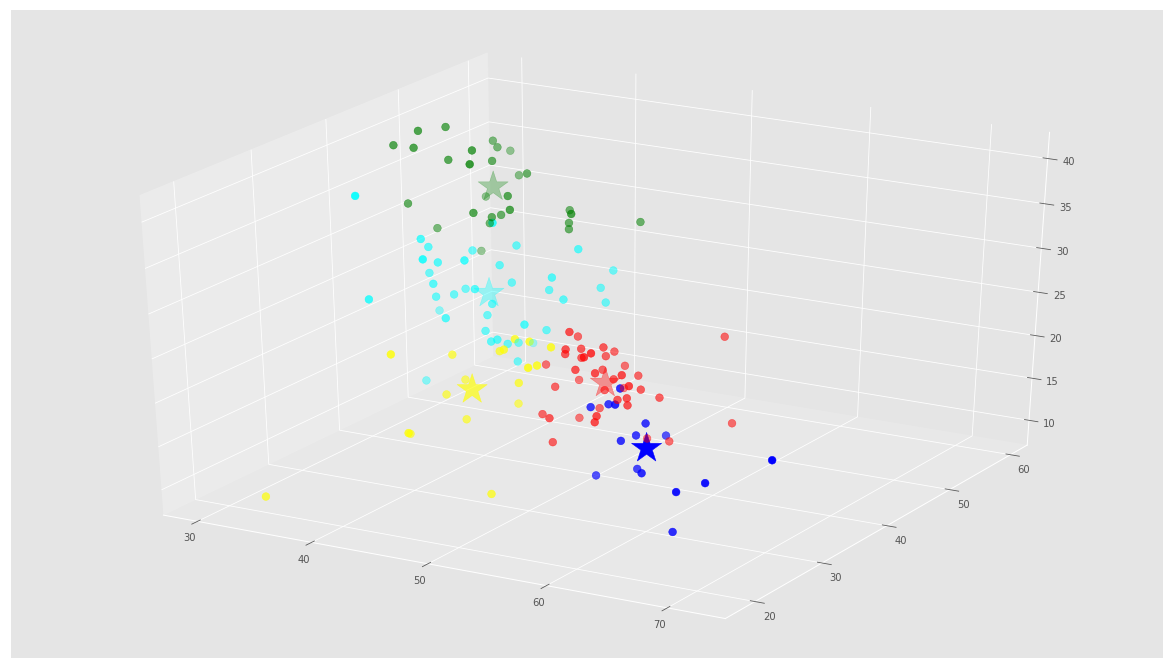

In [124]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X) #calcula las predicciones sin PCA
# Obtenemos los centroids
C = kmeans.cluster_centers_ #obtiene centroides sin PCA
colores=['red','green','blue','cyan','yellow'] #LISTA DE COLORES
asignar=[] #arreglo vacio que contendra los colores de los puntos
for row in labels:  #for que asigna color a los puntos en Y
    asignar.append(colores[row])  # instruccion que es iterada que llena el arreglo asignar

fig = plt.figure()#grafica vacia 
ax = Axes3D(fig) #grafica 3D VACIA
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)  #grafica 3D de tipo scatter con los valores de X
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000) #grafica 3D de tipo scatter con los centroides

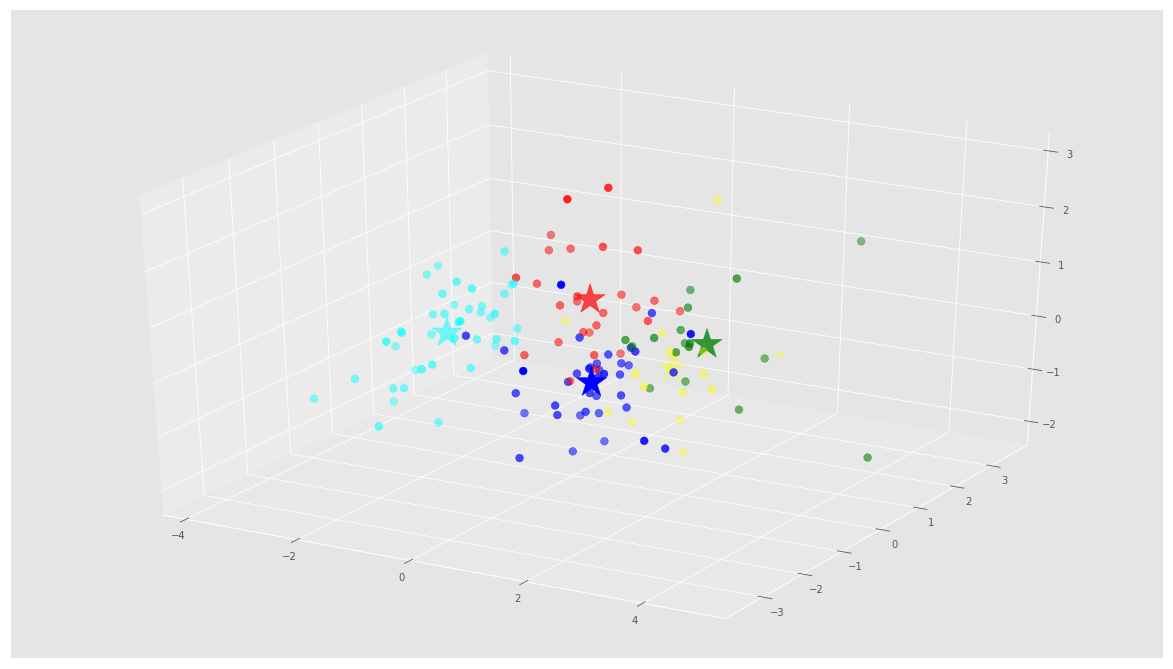

In [134]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeansPCA.predict(X_pca)  #calcula las predicciones con PCA
# Obtenemos los centroids
Centroides = centroidsPCA #obtiene centroides con PCA
colores=['red','green','blue','cyan','yellow']#LISTA DE COLORES
asignar=[] #arreglo vacio que contendra los colores de los puntos
for row in labels: #for que asigna color a los puntos en Y
    asignar.append(colores[row]) # instruccion que es iterada que llena el arreglo asignar

fig = plt.figure() #grafica vacia
ax = Axes3D(fig) #grafica 3D VACIA
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=asignar,s=60) #grafica 3D de tipo scatter 
                                                                  #con los valores de X_PCA
ax.scatter(Centroides[:, 0], Centroides[:, 1], Centroides[:, 2], marker='*', c=colores, s=1000) 
#grafica 3D de tipo scatter con los centroides

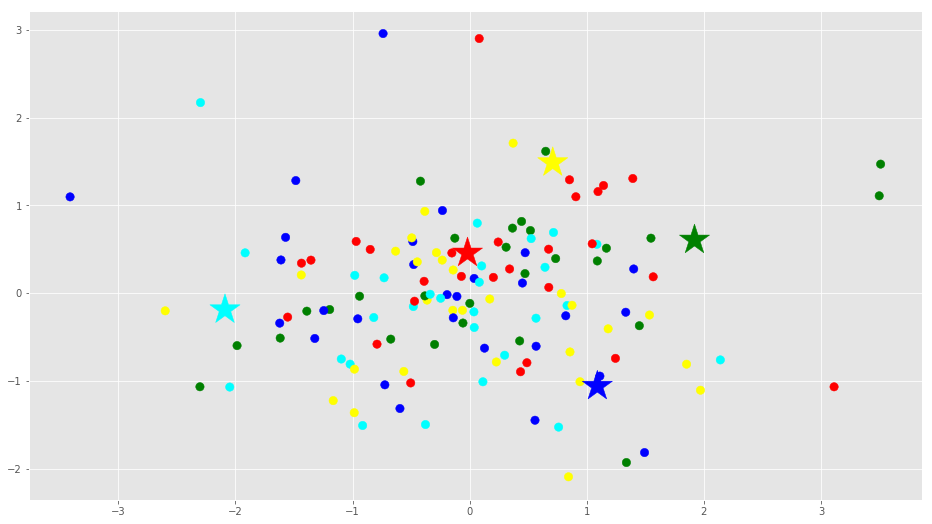

In [162]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = X_pca[:,[1]] #COMPONENTE PRINCIPAL 1
f2 = X_pca[:,[2]] #COMPONENTE PRINCIPAL 2
#print("Centroides sin PCA \n",C) #IMPRIME  LOS CENTROIDES SIN PCA
#print("Centroides con PCA \n",centroidsPCA) #IMPRIME LOS CENTROIDES CON PCA
plt.scatter(f1, f2, c=colores, s=70) #GRAFICA LOS VALORES DE LAS 2 PRIMERAS COMPONENTES PRINCIPALES
plt.scatter(centroidsPCA[:, 0], centroidsPCA[:, 1], marker='*', c=colores, s=1000)#GRAFICA LOS CENTROIDES
plt.show()#MUESTRA LA GRAFICA


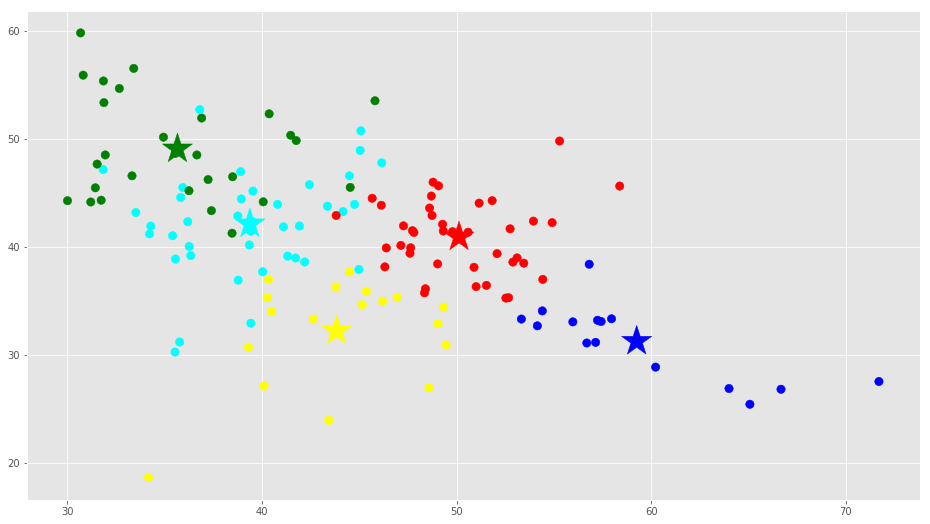

In [95]:
# Getting the values and plotting it
f1 = dataframe['op'].values #OBTIENE LOS VALORES DE 1 DE LAS 3 VARIABLES TOMADAS EN CUENTA SIN PCA
f2 = dataframe['ex'].values#OBTIENE LOS VALORES DE 1 DE LAS 3 VARIABLES TOMADAS EN CUENTA SIN PCA

plt.scatter(f1, f2, c=asignar, s=70) #GRAFICA 2 DE LAS 3 VARIABLES TOMADAS EN CUENTA SIN PCA 
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000) #GRAFICA LOS CENTROIDES SIN PCA
plt.show()#MUESTRA LAS GRAFICAS PREVIAS


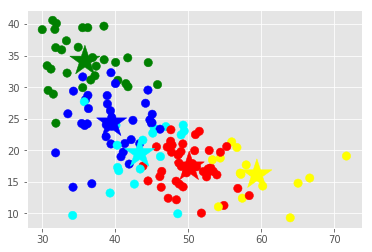

In [13]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['op'].values #OBTIENE LOS VALORES DE 1 DE LAS 3 VARIABLES TOMADAS EN CUENTA SIN PCA
f2 = dataframe['ag'].values #OBTIENE LOS VALORES DE 1 DE LAS 3 VARIABLES TOMADAS EN CUENTA SIN PCA

plt.scatter(f1, f2, c=asignar, s=70) #GRAFICA 2 DE LAS 3 VARIABLES TOMADAS EN CUENTA SIN PCA 
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000) #GRAFICA LOS CENTROIDES SIN PCA
plt.show() #MUESTRA LAS GRAFICAS PREVIAS

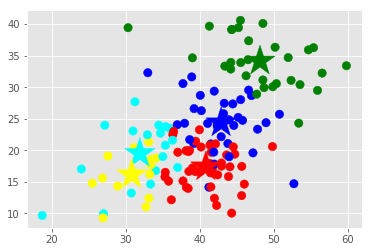

In [14]:

f1 = dataframe['ex'].values #OBTIENE LOS VALORES DE 1 DE LAS 3 VARIABLES TOMADAS EN CUENTA SIN PCA
f2 = dataframe['ag'].values#OBTIENE LOS VALORES DE 1 DE LAS 3 VARIABLES TOMADAS EN CUENTA SIN PCA
plt.scatter(f1, f2, c=asignar, s=70)  #GRAFICA 2 DE LAS 3 VARIABLES TOMADAS EN CUENTA SIN PCA 
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000) #GRAFICA LOS CENTROIDES SIN PCA
plt.show()  #MUESTRA LAS GRAFICAS PREVIAS

In [15]:

# contamos cuantos usuarios hay en cada grupo
copy =  pd.DataFrame() #genera dataframe vacio
copy['usuario']=dataframe['usuario'].values #se añade la columna usuario del dataset anterior
copy['categoria']=dataframe['categoria'].values #se añade la columna categoria del dataset anterior
copy['label'] = labels; #se añade las predicciones como columna
cantidadGrupo =  pd.DataFrame() #genera dataframe vacio
cantidadGrupo['color']=colores #se añade la columna color igual al arreglo de colores
cantidadGrupo['cantidad']=copy.groupby('label').size() #se añade la columna cantidad, que es igual al tamaño
                                                       #de las agrupaciones de las predicciones
cantidadGrupo

,color,cantidad
0,red,42
1,green,30
2,blue,36
3,cyan,18
4,yellow,14


In [16]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 0
group_referrer_index = copy['label'] ==0 #se obtienen los indices de las predicciones que son 0
group_referrals = copy[group_referrer_index] #se obtiennen los valores que son 0
diversidadGrupo =  pd.DataFrame() #crea dataframe vacio
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9] #se añade la columna categoria que es igual a los numeros 0a9
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()#se añade la columna cantidad
                                                                       #que es igual a la longitud de los valores 
                                                                       #de cada categoria
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,11.0
2,2,15.0
3,3,6.0
4,4,3.0
5,5,1.0
6,6,2.0
7,7,2.0
8,8,1.0
9,9,1.0


In [17]:
#imprimimos en pantalla los usuarios con categoria 2 del grupo y su respectiva prediccion
for index, row in group_referrals.iterrows():
    if row["categoria"] == 2:
        print (row["usuario"], row["categoria"],row["label"])

AvrilLavigne 2 0
britneyspears 2 0
celinedion 2 0
Courtney 2 0
Fergie 2 0
gwenstefani 2 0
IamStevenT 2 0
JessieJ 2 0
kanyewest 2 0
katyperry 2 0
KidRock 2 0
LennyKravitz 2 0
MariahCarey 2 0
shakira 2 0
taylorswift13 2 0


In [18]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 21, 121,  64, 123,  82])

In [19]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

carmenelectra
SerranoIsmael
ierrejon
SJP
JudgeJudy


In [20]:
#miramos los usuarios del grupo 0
for index, row in copy.iterrows():
    if row["label"] == 0:
        print (row["usuario"], row["categoria"],row["label"])

andyroddick 7 0
AngelAlessandra 3 0
AvrilLavigne 2 0
BarRefaeli 3 0
britneyspears 2 0
carmenelectra 3 0
celinedion 2 0
CindyCrawford 3 0
CourteneyCox 1 0
Courtney 2 0
Cristiano 7 0
EmWatson 1 0
epunset 6 0
EvaLongoria 3 0
Fergie 2 0
gwenstefani 2 0
heidiklum 3 0
IamStevenT 2 0
JessieJ 2 0
jimlangevin 8 0
jimmyfallon 4 0
justdemi 1 0
kanyewest 2 0
katyperry 2 0
KevinSpacey 1 0
KidRock 2 0
LennyKravitz 2 0
LeoDiCaprio 1 0
MariahCarey 2 0
martinvars 6 0
MelanieGriffith 1 0
MileyCyrus 1 0
Oprah 4 0
PaulaMeliveo 5 0
paulocoelho 9 0
RealHughJackman 1 0
shakira 2 0
taylorswift13 2 0
TheEllenShow 4 0
TheReal_Jlh 1 0
TomCruise 1 0
ZacEfron 1 0


In [148]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta personality traits
new_labels = kmeans.predict(X_new)
print(new_labels)

#NOTA: en el array podemos poner más de un array para evaluar a varios usuarios nuevos a la vez

[1]


In [154]:
X_newPCA = np.array([[45.92,23,57.74,15.66,10,100]]) #array de valores para nueva prediccion con PCA
X_newPCA =pca.transform(X_newPCA) #SE TRANSFORMAN LOS DATOS A LA FORMA QUE REQUIERE ESTE MODELO DE PCA
prediccionPCA=kmeansPCA.predict(X_newPCA) #SE CALCULAN PREDICCIONES CON LOS VALORES CONVERTIDOS
print(prediccionPCA)#SE IMPRIME LA PREDICCION

[4]
